In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras import layers
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.regularizers import L2

In [4]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_validation_path = 'Fruits_Vegetables/validation'

In [6]:
img_width=180
img_height=180

In [8]:
train_data = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False
)

Found 3115 files belonging to 36 classes.


In [10]:
train_data.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [12]:
val_data = tf.keras.utils.image_dataset_from_directory(
    data_validation_path,
    image_size=(img_width,img_height),
    batch_size=32,
    shuffle=True,
    validation_split=False
)

Found 351 files belonging to 36 classes.


In [14]:
data_cat = val_data.class_names

In [16]:
test_data = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


In [18]:
print(train_data.take(1))

<_TakeDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


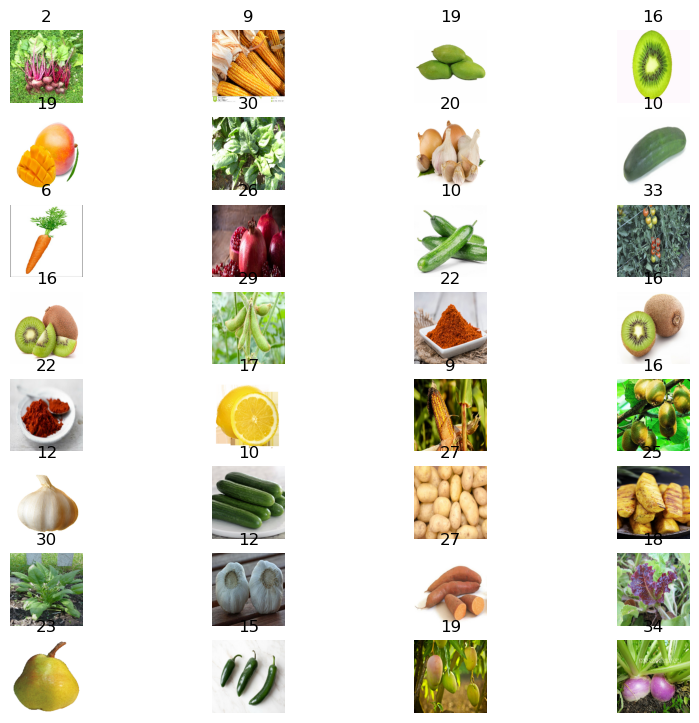

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for images, labels in train_data.take(1):  # Ensure correct unpacking
    images, labels = images.numpy(), labels.numpy()  # Convert tensors to NumPy

    for i in range(min(36, len(images))):  # Prevent indexing errors
        plt.subplot(9, 4, i+1)
        plt.imshow(images[i].astype('uint8'))  # Ensure proper dtype
        plt.title(str(labels[i]))  # Convert label to string if needed
        plt.axis('off')

plt.show()


In [116]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,(3,3),activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
])

In [118]:
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=36, activation='softmax'))

In [120]:
model.compile(optimizer='adam',loss=['sparse_categorical_crossentropy'],metrics=['accuracy'])

In [122]:
history= model.fit(train_data, validation_data = val_data, epochs=50, verbose=1)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 68s 660ms/step - accuracy: 0.0272 - loss: 3.5804 - val_accuracy: 0.0712 - val_loss: 3.4401
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 68s 688ms/step - accuracy: 0.0682 - loss: 3.3880 - val_accuracy: 0.1368 - val_loss: 3.0791
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 84s 854ms/step - accuracy: 0.1138 - loss: 3.0062 - val_accuracy: 0.3191 - val_loss: 2.3037
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 69s 701ms/step - accuracy: 0.2101 - loss: 2.6144 - val_accuracy: 0.3789 - val_loss: 1.9509
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 66s 664ms/step - accuracy: 0.2663 - loss: 2.3825 - val_accuracy: 0.5356 - val_loss: 1.6511
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 65s 662ms/step - accuracy: 0.3262 - loss: 2.1331 - val_accuracy: 0.5926 - val_loss: 1.4130
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 66s 667ms/step - accuracy: 0.4273 - loss: 1.8775 - val_accuracy: 0.6724 - val_loss: 1.1519
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 68s 693ms/step - accuracy: 0.4739 - loss: 1.6700 - val_accu

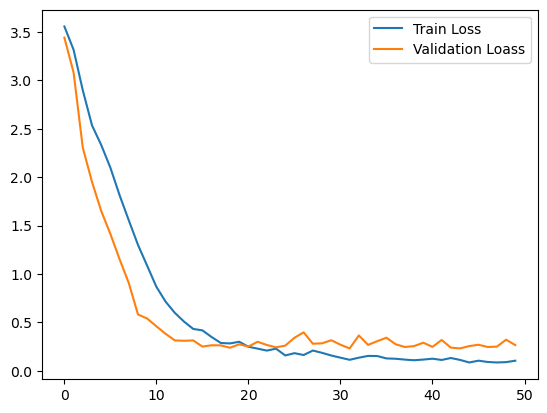

In [124]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train Loss','Validation Loass'])

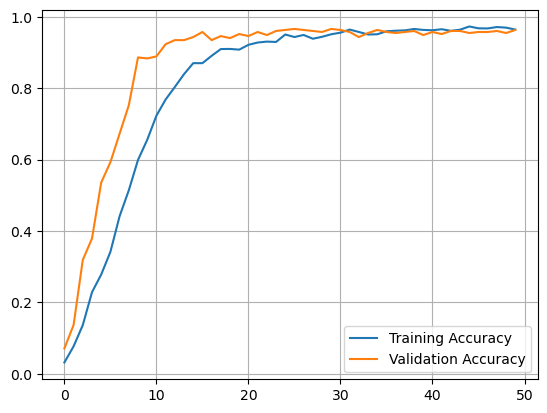

In [126]:
plt.grid(True)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training Accuracy','Validation Accuracy'])

In [266]:
image='pine.jpeg'
image = tf.keras.utils.load_img(image,target_size=(img_width,img_height))
image=tf.keras.utils.array_to_img(image)
image= tf.expand_dims(image,0)

In [268]:
pred =model.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [270]:
score = tf.nn.softmax(pred)

In [272]:
print("The given image is {} with accuracy of {:.2f}".format(data_cat[np.argmax(score)],np.max(score)*100))

The given image is pineapple with accuracy of 7.21


In [264]:
predicted_class = np.argmax(score[0])  # Extract first row
accuracy = np.max(score[0]) * 100  # Extract first row
print(data_cat[predicted_class])
print(accuracy)

paprika
4.126841202378273


In [274]:
model.save('Image_Classifier.keras')